In [23]:
from collections import namedtuple
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
import pandas as pd
import matplotlib.colors as mc
import matplotlib.patches as mpatches
import scipy as sp

In [20]:
# p-values for each subject and averages


DataContainer = namedtuple('DataContainer', 'data name title')

for kind in ['fullrange_cropped_bl']:
    df_data = list()
    for classification, title in zip(
        [
            'RM_vs_RI_vs_LM_vs_LI',
            'RM&RI_vs_LM&LI',
            'LM_vs_LI',
            'RM_vs_RI'
        ], [
            '4 fingers',
            'Left vs Right',
            'Within Left',
            'Within Right'
        ]
    ):
        order = list(it.product(['B1-B3', 'B10-B12'], repeat=2))
        order[-1], order[-2] = order[-2], order[-1]
        all_data = list()
        for i, ((seq1, seq2), color) in enumerate(zip(order, ['blue', 'red', 'orange', 'green'])):
            path = f'../Source/perf_tables_{kind}/{classification}_train_{seq1}_test_{seq2}_sep.csv'
            df = pd.read_csv(path, index_col = 0)
            subjects = set(df.index)
            print(df.test_acc[f'{list(subjects)[0]}'])
            data = np.array([df.test_acc[f'{subject}'].to_numpy() for subject in subjects])
            all_data.append(DataContainer(data, f'{seq1} : {seq2}', title))

        data1, data2 = all_data[:2], all_data[2:]
        for data in [data1, data2]:
            name = f'{data[0].title} | {data[0].name} | {data[1].name}'
            stat, pvals = sp.stats.ttest_rel(data[0].data, data[1].data, axis=1)
            sdata = {
                subject: p
                for subject, p in zip(subjects, pvals)
            }
            stat, pval = sp.stats.ttest_rel(data[0].data.mean(1), data[1].data.mean(1))
            sdata['Average'] = pval
            df_data.append(pd.Series(sdata, name=name))
    df = pd.DataFrame(df_data).T
    df.to_excel(f'../Source/perf_tables_{kind}/{kind}_test.xlsx')

Ku_EL_09    0.701754
Ku_EL_09    0.736842
Ku_EL_09    0.719298
Ku_EL_09    0.771930
Ku_EL_09    0.771930
Ku_EL_09    0.719298
Ku_EL_09    0.719298
Ku_EL_09    0.824561
Ku_EL_09    0.807018
Ku_EL_09    0.754386
Ku_EL_09    0.859649
Name: test_acc, dtype: float64
Ku_EL_09    0.642857
Ku_EL_09    0.625000
Ku_EL_09    0.607143
Ku_EL_09    0.678571
Ku_EL_09    0.660714
Ku_EL_09    0.553571
Ku_EL_09    0.732143
Ku_EL_09    0.750000
Ku_EL_09    0.678571
Ku_EL_09    0.785714
Ku_EL_09    0.642857
Name: test_acc, dtype: float64
Ku_EL_09    0.678571
Ku_EL_09    0.625000
Ku_EL_09    0.696429
Ku_EL_09    0.678571
Ku_EL_09    0.803571
Ku_EL_09    0.678571
Ku_EL_09    0.607143
Ku_EL_09    0.714286
Ku_EL_09    0.678571
Ku_EL_09    0.767857
Ku_EL_09    0.678571
Name: test_acc, dtype: float64
Ku_EL_09    0.614035
Ku_EL_09    0.754386
Ku_EL_09    0.754386
Ku_EL_09    0.649123
Ku_EL_09    0.684211
Ku_EL_09    0.719298
Ku_EL_09    0.508772
Ku_EL_09    0.684211
Ku_EL_09    0.649123
Ku_EL_09    0.596491
Ku_E

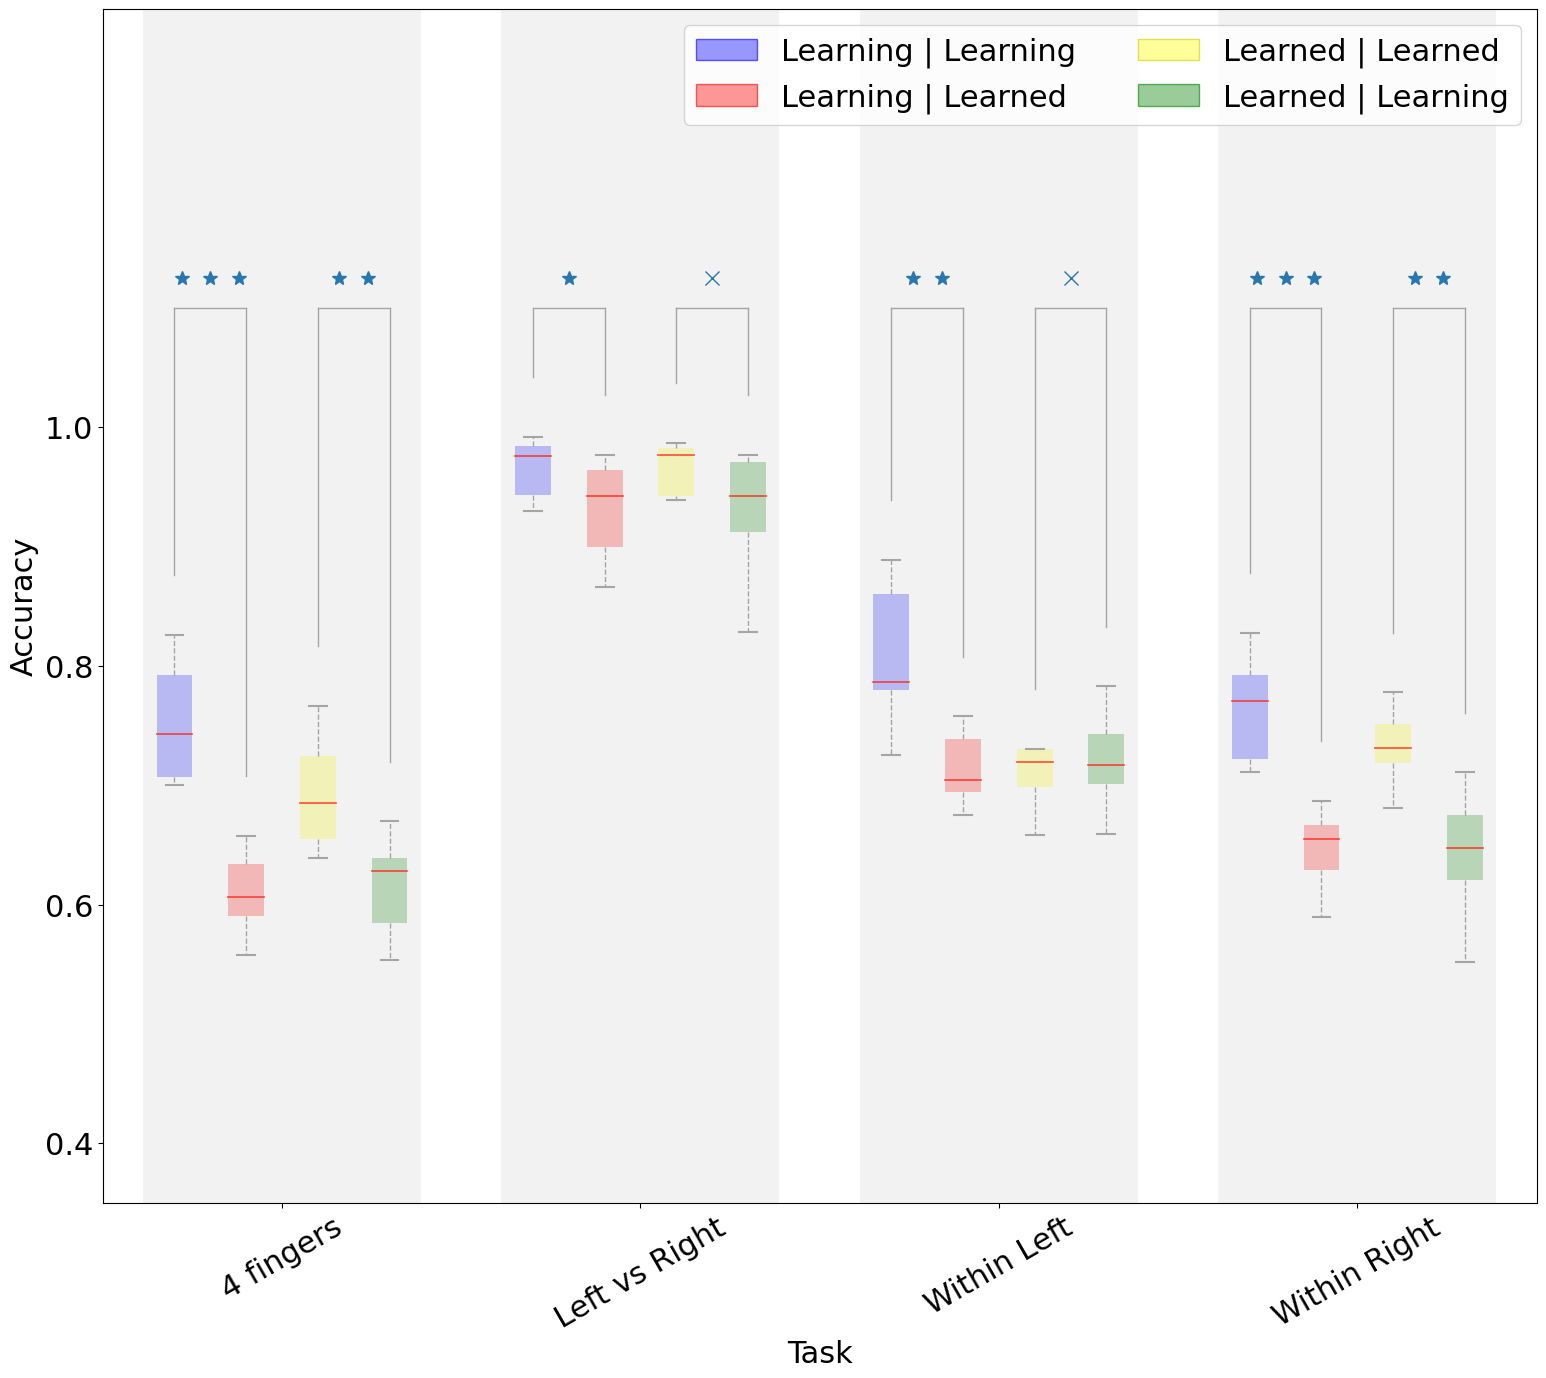

In [27]:

# boxplots classification x sessions to average accuracy
%matplotlib inline

plt.rcParams.update({'font.size': 22})
DataContainer = namedtuple('DataContainer', 'data name title')


def rename_sessions(sessions):
    out = list()
    for session in sessions:
        if session == 'B1-B3':
            out.append('beginning')
        elif session == 'B10-B12':
            out.append('end')
        else:
            raise ValueError(f'Unknown session: {session}')
    return ' : '.join(out)


def plot_stars(n_box, n_stars, star_symbol='*', height=1.125):

    if n_stars%2:
        distances = [np.round((i-n_stars//2)*.4, 2) for i in range(n_stars)]
    else:
        distances = list(map(
            lambda x: x[1] if x[0] >= n_stars//2 else -x[1],
            enumerate(map(
                lambda x: np.round(.2 + x*.4, 2) if x != 0 else .2,
                [i for i in range(n_stars//2)][::-1] + list(range(n_stars//2))
            ))
        ))

    n_box -= .5

    for distance in distances:
        plt.plot(n_box+distance, height, star_symbol, c='#1f77b4', ms=10)

ymin, ymax = .35, 1.35
diff=.35

order = list(it.product(['B1-B3', 'B10-B12'], repeat=2))
order[-1], order[-2] = order[-2], order[-1]

kind = 'fullrange'#_cropped_bl'
excel_file = f'../Source/perf_tables_{kind}/{kind}_test.xlsx'
stat = pd.read_excel(excel_file, index_col=0)
col_info = {
    key: val
    for key, val
    in zip(
        [tuple([
            word.split(' : ')[0] for word in col.split(' | ')
        ][:2]) for col in stat.columns],
        stat.columns
    )
}
all_data = list()
all_titles = list()
all_stats = list()
for classification, title in zip(
    [
        'RM_vs_RI_vs_LM_vs_LI',
        'RM&RI_vs_LM&LI',
        'LM_vs_LI',
        'RM_vs_RI'
    ], [
        '4 fingers',
        'Left vs Right',
        'Within Left',
        'Within Right'
    ]
):
    for i, ((seq1, seq2), color) in enumerate(zip(order, ['blue', 'red', 'orange', 'green'])):
        if i%2:
            all_stats.append(stat[col_info[(title, seq1)]]['Average'])
        path = f'../Source//perf_tables_{kind}/{classification}_train_{seq1}_test_{seq2}_sep.csv'
        df = pd.read_csv(path, index_col = 0)
        data = [df['test_acc'][subject].mean() for subject in set(df['test_acc'].index)]
        all_data.append(data)
        all_titles.append(title)

names = list(map(
    rename_sessions,
    order
))
indices = [i for i in range(len(all_data) + len(all_data)//5) if (i+1)%5]
for i, data in enumerate(all_data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    p1 = min(
        filter(
            lambda datum: q1-1.5*iqr <= datum <= q1,
            data
        )
    )
    p2 = max(
        filter(
            lambda datum: q3 <= datum <= q3+1.5*iqr,
            data
        )
    )

    plt.axvline(indices[i], p2-diff+.05, 1.1-diff, linewidth=1, color='#aaa')

    if i%2:
        if all_stats[i//2] >= .05:
            plot_stars(indices[i], 1, 'x')
        if .01 <= all_stats[i//2] < .05:
            plot_stars(indices[i], 1, '*')
        if .001 <= all_stats[i//2] < .01:
            plot_stars(indices[i], 2, '*')
        if all_stats[i//2] < .001:
            plot_stars(indices[i], 3, '*')

        plt.axhline(1.1, indices[i]*0.05, (indices[i]+1)*0.05, linewidth=1, color='#aaa')

boxplot = plt.boxplot(all_data, positions=indices, showfliers=False, patch_artist=True)
color = '#aaa'
width = 1

colorconfig = {
    session: color
    for session, color in zip(
        names,
        [mc.to_rgba('blue', .25), mc.to_rgba('red', .25), mc.to_rgba('yellow', .25), mc.to_rgba('green', .25)]
    )
}

for i, box in enumerate(boxplot['boxes']):
    box.set_facecolor(colorconfig[names[i%len(names)]])
    box.set_linewidth(0)
for box in boxplot['caps']:
    box.set_color(color)
    box.set_linewidth(width*1.5)
for box in boxplot['whiskers']:
    box.set_color(color)
    box.set_linewidth(width)
    box.set_linestyle('--')
for box in boxplot['medians']:
    box.set_color('#FF1E0F')
    box.set_linewidth(width*1.25)
    box.set_alpha(.75)

middles = [index-1.5 for i, index in enumerate(indices) if not (i+1)%4]
_ = plt.xticks(
    middles,
    [title for i, title in enumerate(all_titles) if not (i+1)%4],
    rotation=30
)
_ = plt.yticks([.4, .6, .8, 1.])

for i in middles:
    plt.axvline(i, 0, 1, c='gray', alpha=.1, linewidth=200)

plt.xlim(-1, indices[-1]+1)
plt.ylim(ymin, ymax)

b = mpatches.Patch(facecolor=mc.to_rgba('blue', .4), label='Learning | Learning', edgecolor=mc.to_rgba('blue', .6))
r = mpatches.Patch(facecolor=mc.to_rgba('red', .4), label='Learning | Learned', edgecolor=mc.to_rgba('red', .6))
o = mpatches.Patch(facecolor=mc.to_rgba('yellow', .4), label='Learned | Learned', edgecolor=mc.to_rgba('#cccc00', .6))
g = mpatches.Patch(facecolor=mc.to_rgba('green', .4), label='Learned | Learning', edgecolor=mc.to_rgba('green', .6))

plt.legend(handles=[b, r, o, g], ncol=2, loc='upper right')
fig = plt.gcf()
fig.set_size_inches(18.5, 15.5)
plt.xlabel('Task')
plt.ylabel('Accuracy')
plt.show()
fig.savefig(f'/home/user/Downloads/Pics/{kind}_boxplot.jpg', dpi=500)
plt.close()
